## Solution de référence
***
<br>

# ITSMO > Traitement des signaux

## Filtrage passe-bas
Le filtrage passe-bas consiste à atténuer les composantes fréquentielles supérieures à une certaine fréquence de coupure, judicieusement choisie en fonction du résultat attendu.

Dans cet exemple, les différentes étapes d'une méthodologie de mise en oeuvre sont présentées : 
1. analyse d'un signal représentatif (pré-enregistré) pour déterminer une fréquence de coupure, 
2. synthèse d'un filtre,
3. vérification et étude des caractéristiques de ce filtre, 
4. application de ce filtre au signal représentatif.

Par rapport à une application réelle, il manque : 
1. l'obtention du signal représentatif, c'est-à-dire l'expérience réalisée, les mesures correspondantes, et leur enregistrement dans un fichier de données,
2. l'application du filtre à toutes les mesures qui suivent, et non pas seulement à l'échantillon représentatif.

### Chargement du signal réel mesuré et "représentatif"
Soit un signal de mesure de température $T$ (salle de travaux pratiques ENSCBP) échantillonné à la fréquence $\nu e = 1 Hz$ et enregistré dans un fichier de données. Ce signal est supposé représentatif car il a été obtenu en réalisant une expérience particulière dans ce but (dont la nature n'est pas détaillée ici). 

L'objectif est de "lisser" ce signal afin de conserver son allure générale déterministe (basses fréquences) tout en atténuant le bruit de mesure aaléatoire (hautes fréquences).

> Exécutez le code ci-dessous.

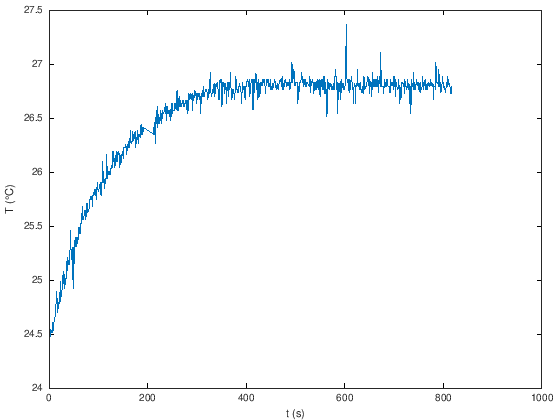

In [1]:
% Chargement du signal mesuré (enregistré à la fréquence de 1 Hz dans le fichier "Tx.mat")
data = load('data/ech50a60.dat');
t = data(:,1);
T = data(:,4);
N = length(T);

% Tracé
plot(t,T)
xlabel('t (s)');
ylabel('T (\degC)')

### Analyse du signal $\rightarrow$ choix de la fréquence de coupure du filtre
> Calculez la densité spectrale de puissance du signal $T$ en utilisant la fonction `pwelch` (méthode de Welch), puis tracez-la.
><br> Vous pouvez faire varier les paramètres de la méthode de Welch correspondant à la taille des fenêtres et à leur taux de recouvrement.
><br> Il est conseillé de zoomer sur les valeurs de faibles amplitude avec la fonction `ylim`, afin de faciliter la lecture du spectre.

> Choisissez une fréquence de coupure $\nu_c$, en deçà de laquelle se trouvent les composantes basses fréquences de forte amplitude, et au-delà de laquelle se trouvent les composantes hautes fréquences de faible amplitude.

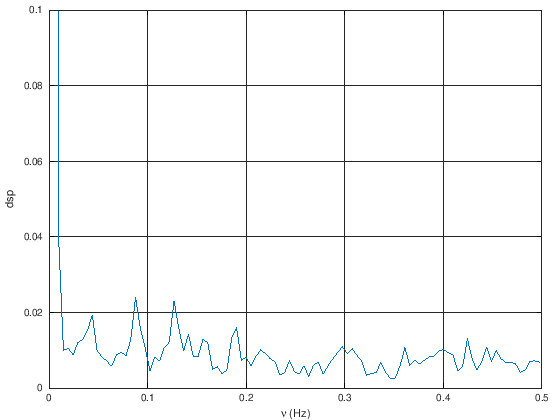

In [2]:
% Calcul de la densité spectrale de puissance
nue = 1;
[p,nu] = pwelch(T-mean(T),round(length(T)/4),0.5,[],nue);

% Tracé
plot(nu,p)
ylim([0,0.1]); grid
xlabel('\nu (Hz)');
ylabel('dsp');

### Synthèse du filtre 
>Calculez les coefficients d'un filtre passe-bas numérique de butterworth du deuxième ordre, dont la fréquence de coupure est égale à $\nu_c$, à l'aide de la fonction `butter`.

In [3]:
% Fréquence de coupure
nuc = 0.03; % Hz

% Calcul des coefficients de la fonction de transfert en z du filtre
[B,A] = butter(2,nuc/(0.5*nue))

B =

   0.0078202   0.0156404   0.0078202

A =

   1.00000  -1.73473   0.76601



### Caractéristiques du filtre
> Calculez les zéros, les pôles, et le gain statique de ce filtre, à l'aide des fonctions `roots` et `sum`.

In [4]:
% Zéros 
roots(B)

% Pôles
roots(A)

% Gain statique
Gs = sum(B)/sum(A)

ans =

  -1
  -1

ans =

   0.86736 + 0.11700i
   0.86736 - 0.11700i

Gs =  1.00000


> Calculez le gain complexe de ce filtre grâce à la fonction `freqz`, puis tracez son module (en utilisant la fonction `abs`) et son retard de phase (en utilisant la fonction `angle`).

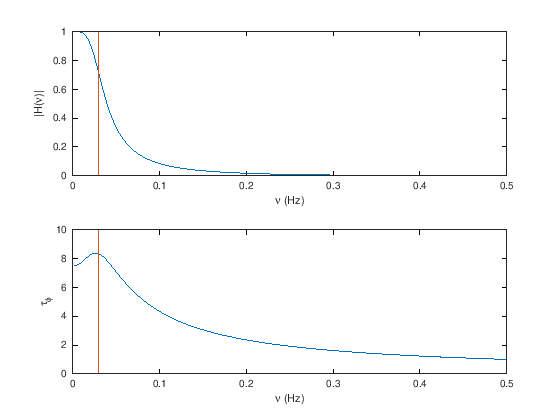

In [5]:
% Calcul du gain complexe
[H,nu] = freqz(B,A,[],nue);

% Tracé
subplot(2,1,1);
plot(nu,abs(H),[nuc nuc],[0 1])
xlabel('\nu (Hz)');
ylabel('|H(\nu)|');
subplot(2,1,2)
plot(nu,-angle(H)./(2*pi*nu),[nuc nuc],[0 10])
xlabel('\nu (Hz)');
ylabel('\tau_\phi');

### Application du filtre et vérifications
> Appliquez le filtre au signal $T$ à l'aide de la fonction `filtfilt` qui simule un filtre **en temps différé**, et tracez sur un même graphique le signal non-filtré $T$ et le signal filtré (c'est-à-dire sans retard).

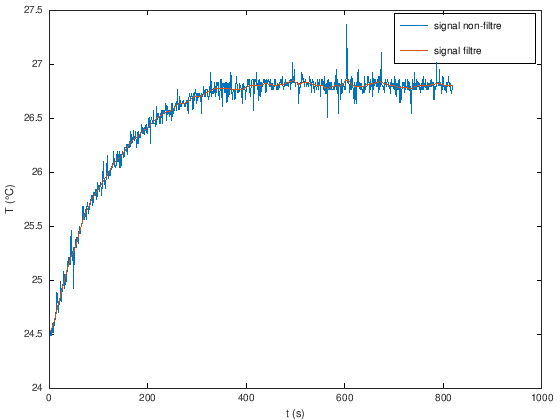

In [6]:
% Calcul du signal filtré
Tf = filtfilt(B,A,T);

% Tracé
plot([T Tf])
xlabel('t (s)');
ylabel('T (\degC)');
legend('signal non-filtre', 'signal filtre')

> Appliquez le filtre au signal $T$ à l'aide de la fonction `filter` qui simule un filtre **en temps réel**, et tracez sur un même graphique le signal non-filtré $T$ et le signal filtré (c'est-à-dire avec retard).
><br> Zoomez sur une partie du tracé pour mettre le retard en évidence.

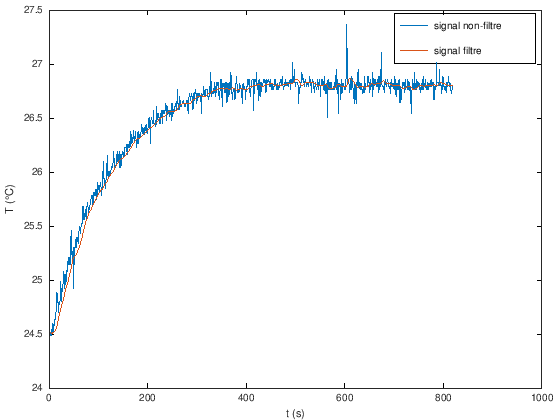

In [7]:
% Calcul du signal filtré
Tf = filter(B,A,T-T(1))+T(1);

% Tracé
plot([T Tf])
xlabel('t (s)');
ylabel('T (\degC)');
legend('signal non-filtre', 'signal filtre')

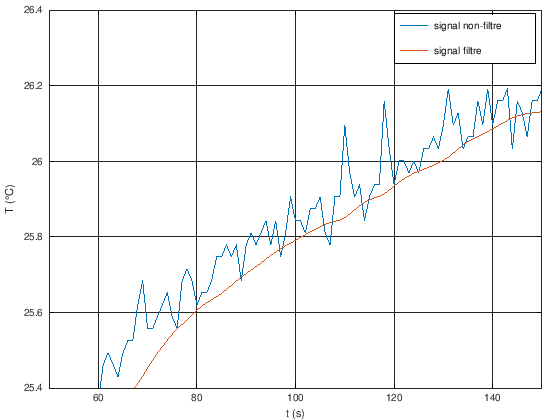

In [8]:
% Tracé zoommé
plot([T Tf])
xlim([50 150]); ylim([25.4 26.4]); grid
xlabel('t (s)');
ylabel('T (\degC)');
legend('signal non-filtre', 'signal filtre')

> Calculez la densité spectrale de puissance du signal filtré en utilisant la fonction `pwelch` (méthode de Welch), puis tracez-la sur un même graphique que la densité spectrale de puissance du signal non-filtré.

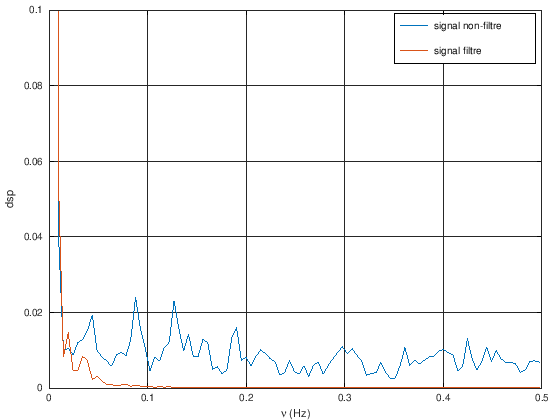

In [9]:
% Calcul de la densité spectrale de puissance
[pf,nu] = pwelch(Tf-mean(Tf),round(length(Tf)/4),0.5,[],nue);

% Tracé
plot(nu,p,nu,pf)
ylim([0,0.1]); grid
xlabel('\nu (Hz)');
ylabel('dsp');
legend('signal non-filtre', 'signal filtre')

## Filtrage passe-haut
Le filtrage passe-haut consiste à atténuer les composantes fréquentielles inférieures à une certaine fréquence de coupure, judicieusement choisie en fonction du résultat attendu.

La méthodologie de mise en oeuvre est la même que pour un filtre passe-bas.

### Synthèse du filtre 
>Calculez les coefficients d'un filtre passe-haut numérique de butterworth du deuxième ordre, dont la fréquence de coupure est égale à $\nu_c$ (la même que celle du filtre passe-bas précédent), à l'aide de la fonction `butter`.

In [10]:
% Fréquence de coupure
nuc = 0.03; % Hz

% Calcul des coefficients de la fonction de transfert en z du filtre
[B,A] = butter(2,nuc/(0.5*nue), 'high')

B =

   0.87518  -1.75037   0.87518

A =

   1.00000  -1.73473   0.76601



### Caractéristiques, application et vérifications
> Vous pouvez refaire les mêmes analyses et vérifications que précédemment ! Caractéristiques du filtre, application au signal, etc. 

In [11]:
% Zéros 
roots(B)

% Pôles
roots(A)

% Gain statique
Gs = sum(B)/sum(A)

ans =

   1
   1

ans =

   0.86736 + 0.11700i
   0.86736 - 0.11700i

Gs = 0


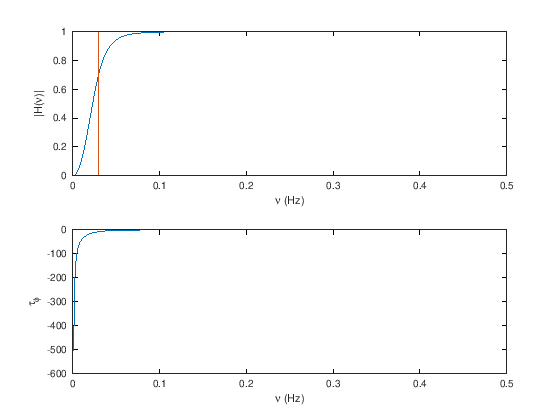

In [12]:
% Calcul du gain complexe
[H,nu] = freqz(B,A,[],nue);

% Tracé
subplot(2,1,1);
plot(nu,abs(H),[nuc nuc],[0 1])
xlabel('\nu (Hz)');
ylabel('|H(\nu)|');
subplot(2,1,2)
plot(nu,-angle(H)./(2*pi*nu))
xlabel('\nu (Hz)');
ylabel('\tau_\phi');

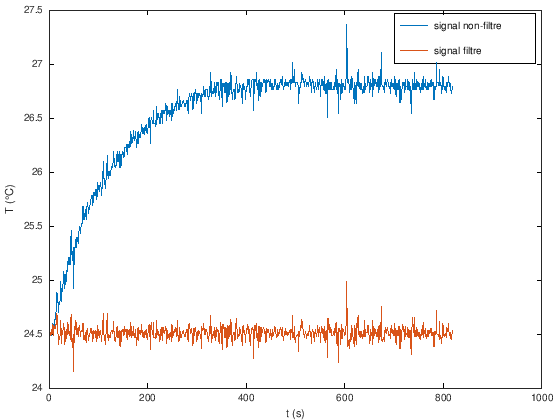

In [13]:
% Calcul du signal filtré
Tf = filter(B,A,T-T(1))+T(1);

% Tracé
plot([T Tf])
xlabel('t (s)');
ylabel('T (\degC)');
legend('signal non-filtre', 'signal filtre')

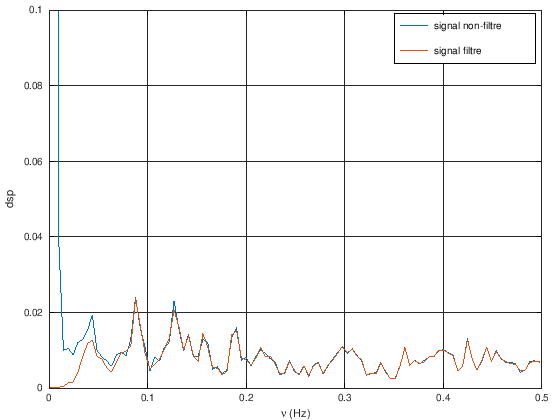

In [14]:
% Calcul de la densité spectrale de puissance
[pf,nu] = pwelch(Tf-mean(Tf),round(length(Tf)/4),0.5,[],nue);

% Tracé
plot(nu,p,nu,pf)
ylim([0,0.1]); grid
xlabel('\nu (Hz)');
ylabel('dsp');
legend('signal non-filtre', 'signal filtre')

> Dans les deux cas proposés (filtres passe-bas et passe-haut), vous pouvez aussi faire varier d'autres paramètres, tels que l'ordre des filtres ou les fréquence de coupure, pour observer les effets de ces choix. N'hésitez pas à expérimenter !